# T-SNE - Librairie & fonctions utiles

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import os


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D


In [2]:
NB_MULTI_TAB = 10
NB_FRAME = 15
NB_ZONE_VISAGE = 17

def recupResultats(path, videoName):

    fichier = open(path + videoName, "r")
    strRes = fichier.read()
    debutMultiTab = 0

    resultats = np.empty([NB_MULTI_TAB, NB_ZONE_VISAGE, NB_FRAME])

    for i in range(NB_MULTI_TAB):
        debutMultiTab = strRes.find("[[", debutMultiTab + 1)
        debutTab = 0
        finTab = 0
        for j in range(NB_ZONE_VISAGE):
            if j == 0:
                debutTab = strRes.find("[", debutMultiTab + debutTab + 1)
                finTab = strRes.find("]", debutMultiTab + finTab + 2)
            else:
                debutTab = strRes.find("[", debutTab + 1)
                finTab = strRes.find("]", finTab + 2)

            resultats[i][j] = np.fromstring(strRes[debutTab + 1: finTab], dtype=float, sep=' ')

    fichier.close()
    return resultats

def recupMaxParZone(resultats, ok):

    maxParZone = np.empty([NB_ZONE_VISAGE, NB_MULTI_TAB])
    for i in range(NB_MULTI_TAB):
        for j in range(NB_ZONE_VISAGE):
            maxParZone[j][i] = np.max(resultats[i][j])
    return maxParZone

def moyenneParZone(resultats):
    moyenneParZone = np.empty([NB_ZONE_VISAGE, NB_MULTI_TAB])
    for i in range(NB_MULTI_TAB):
        for j in range(NB_ZONE_VISAGE):
            moyenneParZone[j][i] = np.mean(resultats[i][j])
    return moyenneParZone

# Test avec les données provenant de l'application mobile

In [3]:
PATH = "ResultatsMobile/"
lstVideo = [f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))]
lstVideo.sort()
lstResultats = np.empty([len(lstVideo),NB_MULTI_TAB, NB_ZONE_VISAGE, NB_FRAME])
lstMaxParZone = np.empty([len(lstVideo), NB_ZONE_VISAGE, NB_MULTI_TAB])
y = [''] * len(lstVideo)
for i, video in enumerate(lstVideo):
    try:
        lstResultats[i] = recupResultats(PATH,video)
    except:
        print("Cette video contient des restultats incorrect pour votre configuration : " + video)
    lstMaxParZone[i] = recupMaxParZone(lstResultats[i], i)
    y[i] = video[0]

In [4]:
feat_cols = [""] * NB_MULTI_TAB * NB_ZONE_VISAGE
for i in range(NB_ZONE_VISAGE):
    for j in range(NB_MULTI_TAB):
            feat_cols[i * NB_MULTI_TAB + j] = "Max_" + str(j + 1) + "_Zone_" + str(i + 1)
lstMaxParZone = lstMaxParZone.reshape(len(lstMaxParZone), NB_MULTI_TAB * NB_ZONE_VISAGE)
df = pd.DataFrame(lstMaxParZone,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (39, 172)


In [5]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000)
tsne_results = tsne.fit_transform(lstMaxParZone)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 38 nearest neighbors...
[t-SNE] Indexed 39 samples in 0.000s...
[t-SNE] Computed neighbors for 39 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 39 / 39
[t-SNE] Mean sigma: 17.593209
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.620224
[t-SNE] KL divergence after 1000 iterations: 0.432063
t-SNE done! Time elapsed: 0.18151426315307617 seconds


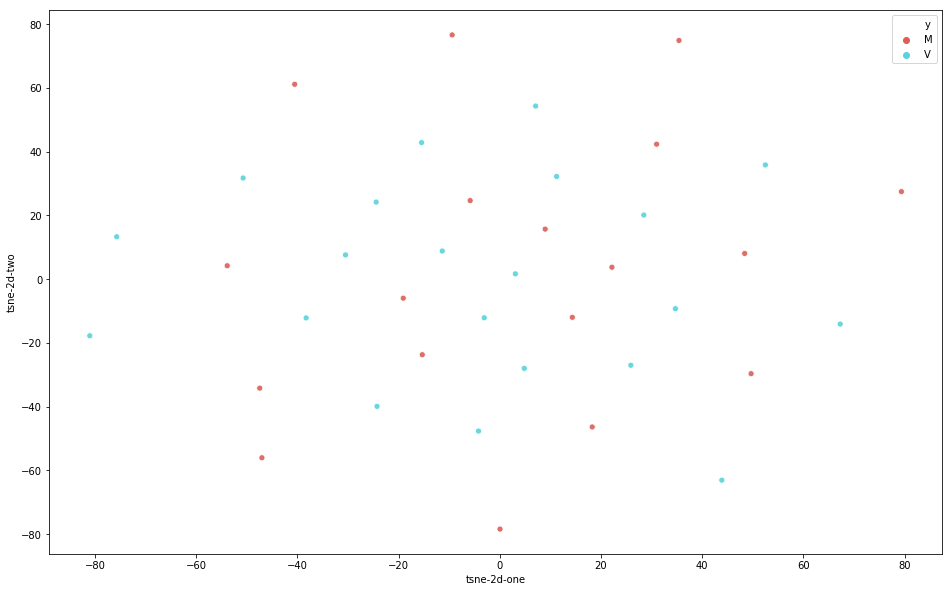

In [6]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.9
)

# Test avec les données contenant plus de FPS

In [7]:
PATH = "ResultatsPlusFPS/"
lstVideo = [f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))]
lstVideo.sort()
lstResultats = np.empty([len(lstVideo),NB_MULTI_TAB, NB_ZONE_VISAGE, NB_FRAME])
lstMaxParZone = np.empty([len(lstVideo), NB_ZONE_VISAGE, NB_MULTI_TAB])
y = [''] * len(lstVideo)
for i, video in enumerate(lstVideo):
    try:
        lstResultats[i] = recupResultats(PATH,video)
    except:
        print("Cette video contient des restultats incorrect pour votre configuration : " + video)
    lstMaxParZone[i] = recupMaxParZone(lstResultats[i], i)
    y[i] = video[0]

Cette video contient des restultats incorrect pour votre configuration : M18.mp4_contient_des_NaN.txt
Cette video contient des restultats incorrect pour votre configuration : V14.mp4_contient_des_NaN.txt


In [8]:

feat_cols = [""] *  NB_MULTI_TAB * NB_ZONE_VISAGE
for i in range(NB_ZONE_VISAGE):
    for j in range(NB_MULTI_TAB):
            feat_cols[i * NB_MULTI_TAB + j] = "Max_" + str(j + 1) + "_Zone_" + str(i + 1)
lstMaxParZone = lstMaxParZone.reshape(len(lstMaxParZone), NB_MULTI_TAB * NB_ZONE_VISAGE)
df = pd.DataFrame(lstMaxParZone,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))


Size of the dataframe: (100, 172)


In [9]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(lstMaxParZone)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 9.513936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.817333
[t-SNE] KL divergence after 1000 iterations: 0.325313
t-SNE done! Time elapsed: 0.39996933937072754 seconds


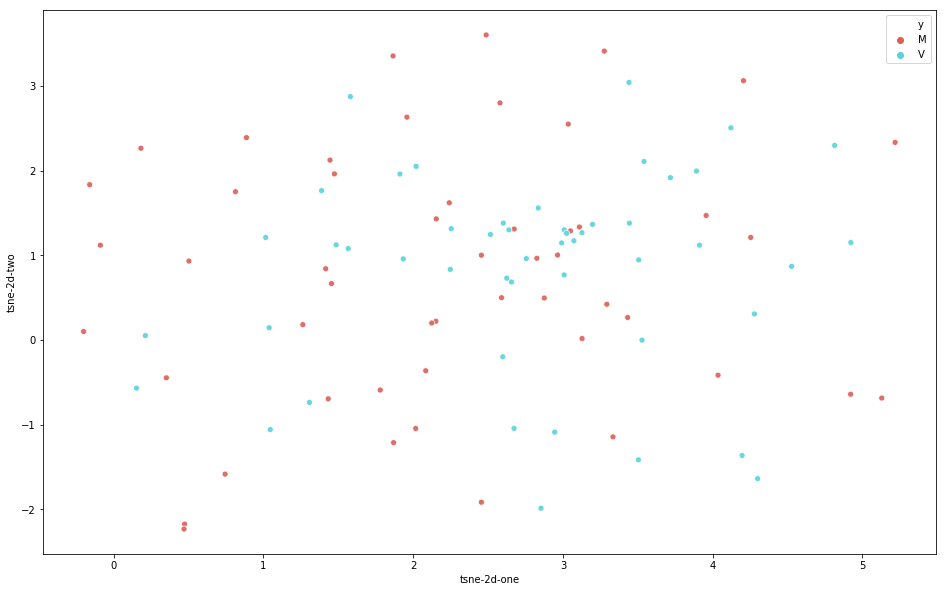

In [10]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.9
)

# Test de séparation d'expressions

In [11]:
NB_MULTI_TAB = 6
PATH = "ResultatsDiff2Expr/"
lstVideo = [f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))]
lstVideo.sort()
lstResultats = np.empty([len(lstVideo),NB_MULTI_TAB, NB_ZONE_VISAGE, NB_FRAME])
lstMaxParZone = np.empty([len(lstVideo), NB_ZONE_VISAGE, NB_MULTI_TAB])
y = [''] * len(lstVideo)
for i, video in enumerate(lstVideo):
    try:
        lstResultats[i] = recupResultats(PATH,video)
    except:
        print("Cette video contient des restultats incorrect pour votre configuration : " + video)
    lstMaxParZone[i] = recupMaxParZone(lstResultats[i], i)
    y[i] = video[0:2]

In [12]:
feat_cols = [""] *  NB_MULTI_TAB * NB_ZONE_VISAGE
for i in range(NB_ZONE_VISAGE):
    for j in range(NB_MULTI_TAB):
            feat_cols[i * NB_MULTI_TAB + j] = "Max_" + str(j + 1) + "_Zone_" + str(i + 1)
lstMaxParZone = lstMaxParZone.reshape(len(lstMaxParZone), NB_MULTI_TAB * NB_ZONE_VISAGE)
df = pd.DataFrame(lstMaxParZone,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (100, 104)


In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsne_results = tsne.fit_transform(lstMaxParZone)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 6.742256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.386993
[t-SNE] KL divergence after 600 iterations: 0.172761
t-SNE done! Time elapsed: 0.25632548332214355 seconds


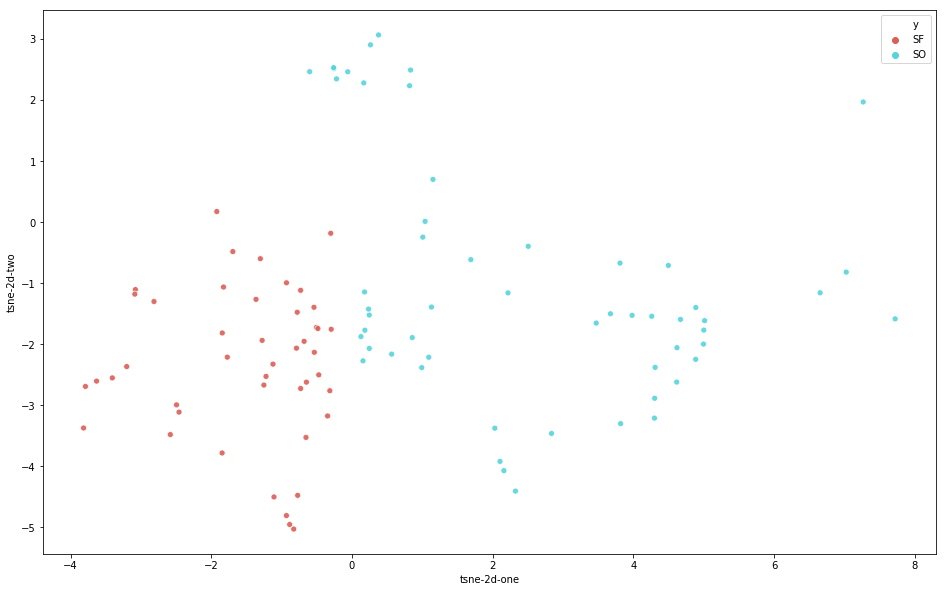

In [14]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.9
)

# Test de séparation d'expressions avec plus d'expressions

In [23]:
NB_MULTI_TAB = 6
PATH = "ResultatsDiff3Expr/"
lstVideo = [f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))]
lstVideo.sort()
lstResultats = np.empty([len(lstVideo),NB_MULTI_TAB, NB_ZONE_VISAGE, NB_FRAME])
lstMaxParZone = np.empty([len(lstVideo), NB_ZONE_VISAGE, NB_MULTI_TAB])
y = [''] * len(lstVideo)
for i, video in enumerate(lstVideo):
    try:
        lstResultats[i] = recupResultats(PATH,video)
    except:
        print("Cette video contient des restultats incorrect pour votre configuration : " + video)
    lstMaxParZone[i] = recupMaxParZone(lstResultats[i], i)
    y[i] = video[0:2]

In [24]:
feat_cols = [""] *  NB_MULTI_TAB * NB_ZONE_VISAGE
for i in range(NB_ZONE_VISAGE):
    for j in range(NB_MULTI_TAB):
            feat_cols[i * NB_MULTI_TAB + j] = "Max_" + str(j + 1) + "_Zone_" + str(i + 1)
lstMaxParZone = lstMaxParZone.reshape(len(lstMaxParZone), NB_MULTI_TAB * NB_ZONE_VISAGE)
df = pd.DataFrame(lstMaxParZone,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (146, 104)


In [25]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(lstMaxParZone)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 145 nearest neighbors...
[t-SNE] Indexed 146 samples in 0.000s...
[t-SNE] Computed neighbors for 146 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 146 / 146
[t-SNE] Mean sigma: 7.708693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 117.170174
[t-SNE] KL divergence after 1000 iterations: 1.413480
t-SNE done! Time elapsed: 1.6146395206451416 seconds


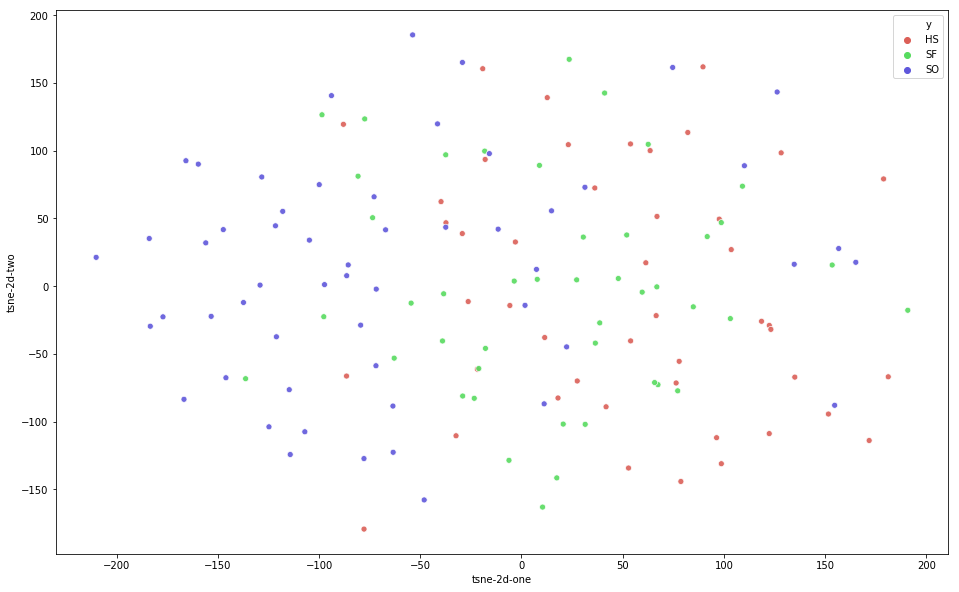

In [26]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
df['tsne-2d-three'] = tsne_results[:,2]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.9
)